beta: 0.48	 beta scale:0.04


<function matplotlib.pyplot.close(fig=None)>

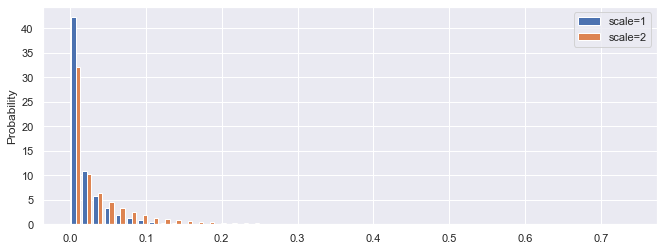

In [3]:
import sys
import numpy as np
import scipy.special as sps
from tqdm import tqdm_notebook
import pickle
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import time
import init_common as z
import init_spec_gamma as zz
import load_part as lp

sns.set(rc={'figure.figsize':(11, 4)})

## Plotting
## 1. Histogram beta ~ gamma dist
# parameters: shape,scale,size
sim_num=10**5
num_bin = 50
beta = zz.beta;
beta_scale = zz.beta_scale
beta_scale2 = beta_scale*2
print("beta: "+str(beta)+"\t beta scale:"+str(beta_scale))

beta_vec1 = np.random.gamma(beta,beta_scale,sim_num)
beta_vec2 = np.random.gamma(beta,beta_scale2,sim_num)
beta_max0 = 4
beta_vec_adj1 = np.where(beta_vec1>beta_max0,beta_max0, beta_vec1)
beta_vec_adj2 = np.where(beta_vec2>beta_max0,beta_max0, beta_vec2)
cnt,bins,ign = plt.hist([beta_vec_adj1,beta_vec_adj2],bins=num_bin,density=True)
#yy1=bins**(beta-1)*(np.exp(-bins/beta_scale)/(sps.gamma(beta)*beta_scale**beta))
#yy2=bins**(beta-1)*(np.exp(-bins/beta_scale2)/(sps.gamma(beta)*beta_scale2**beta))
#plt.plot(bins,yy1,linewidth=2,color='c')
#plt.plot(bins,yy2,linewidth=2,color='r')
plt.legend(['scale=1', 'scale=2'])
plt.ylabel('Probability')
plt.savefig("./fig/Histogram_betas_0.png")
plt.close

<function matplotlib.pyplot.close(fig=None)>

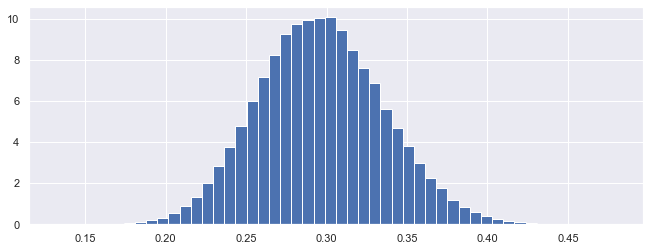

In [4]:
# 2. Histogram: beta~ beta dist. (very narrow)
beta_vec = np.random.beta(40,95,sim_num)
cnt,bins,ign = plt.hist(beta_vec,bins=num_bin,density=True)
plt.savefig("./fig/Histogram_betas_1.png")
plt.close

R0:=2.4


<function matplotlib.pyplot.close(fig=None)>

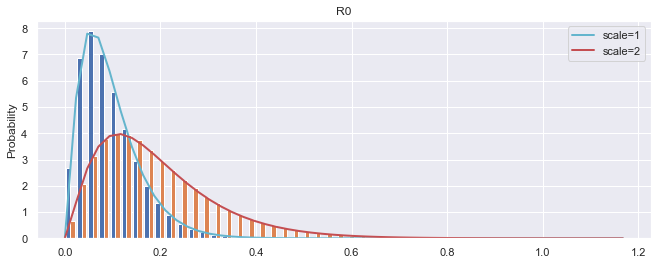

In [5]:
# 3. distribution for R0
# assumption: gamma is a scalar, not a random variable

R0_vec1 = np.random.gamma(z.R0,zz.beta_scale,200000)
R0_vec2 = np.random.gamma(z.R0,beta_scale2,200000)
print("R0:="+str(z.R0))
R0_max = beta_max0/z.gamma
R0_vec1 = np.where(R0_vec1>R0_max, R0_max, R0_vec1)
R0_vec2 = np.where(R0_vec2>R0_max, R0_max, R0_vec2)
cnt,bins,ign=plt.hist([R0_vec1,R0_vec2],bins=50,density=True)
yy1=bins**(z.R0-1)*(np.exp(-bins/beta_scale)/(sps.gamma(z.R0)*beta_scale**z.R0))
yy2=bins**(z.R0-1)*(np.exp(-bins/beta_scale2)/(sps.gamma(z.R0)*beta_scale2**z.R0))
plt.plot(bins,yy1,linewidth=2,color='c')
plt.plot(bins,yy2,linewidth=2,color='r')
plt.ylabel('Probability')
plt.title('R0')
plt.legend(['scale=1','scale=2'])
plt.savefig("./fig/Histogram_R0.png")
plt.close

mean=	7.99588239599973(data)	8(theory)
std=	3.996385800199072(data)	32.0(theory)


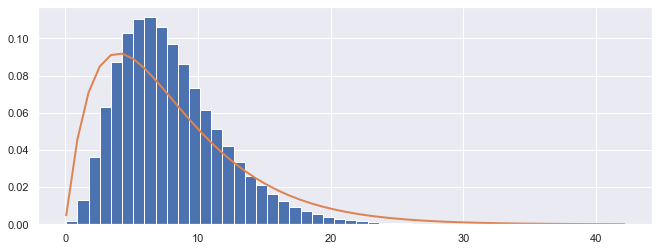

In [32]:
k=2
smean = 8
lam = k/smean
# erlang distribution: we generate random samples
gamma_vec = np.random.gamma(smean/k,k,1000000)
cnt,bins,ign=plt.hist(gamma_vec,bins=50,density=True)
y_vec = lam**k*bins**(k-1)*np.exp(-lam*bins)/np.math.factorial(k-1)
plt.plot(bins,y_vec,linewidth=2)
print("mean=\t"+str(np.mean(gamma_vec))+"(data)\t"+str(smean)+"(theory)")
print("std=\t"+str(np.std(gamma_vec))+"(data)\t"+str(k/(lam**2))+"(theory)")